In [1]:
import os
_ROOT_PATH = os.path.join('..', '..', '..')
_OPTIM_DIR = os.path.join(_ROOT_PATH, 'experiments', 'optim_ablation')
_FINAL_DFS_DIR = os.path.join('..', '..', 'final_dfs')

import sys
sys.path.append('..')
sys.path.append(os.path.join('..', '..', '..', 'tools'))
import plotconfig

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dbf = os.path.join(_FINAL_DFS_DIR, 'optim_ablation.parquet')
df = pd.read_parquet(dbf, engine='pyarrow')
df

,method_name,number,value,euclidean_distance,rmse_true_vs_estimated,ablation_distance,run_type
0,LinearRegression,0,1.001659,28.079715,17.720737,25,ablation
1,LinearRegression,1,0.998253,12.823638,17.720737,25,ablation
2,LinearRegression,2,0.996458,14.093707,17.720737,25,ablation
3,LinearRegression,3,1.001572,8.796211,17.720737,25,ablation
4,LinearRegression,4,1.004591,16.307747,17.720737,25,ablation
...,...,...,...,...,...,...,...
9179995,DummyScoring_Mean,995,1.000000,24.501106,17.711224,0,ablation
9179996,DummyScoring_Mean,996,1.000000,23.908035,17.711224,0,ablation
9179997,DummyScoring_Mean,997,1.000000,25.577454,17.711224,0,ablation
9179998,DummyScoring_Mean,998,1.000000,24.343669,17.711224,0,ablation


In [3]:
# Assuming df is your original dataframe
# Remove Shuffle_LinearRegression and Dummy from control run_type
df_filtered = df[~((df['run_type'] == 'control') & 
                   (df['method_name'].isin(['Shuffle_LinearRegression', 'DummyScoring_Mean'])))]

# Get the last number for each method, ablation distance, and run_type
last_values = df_filtered.groupby(['method_name', 'ablation_distance', 'run_type'])['number'].max().reset_index()
df_last = df_filtered.merge(last_values, on=['method_name', 'ablation_distance', 'run_type', 'number'])

# Create a combined column for method and run_type
# df_last['method_run'] = df_last['method_name'] + ' (' + df_last['run_type'] + ')'

# Create a combined column for method and run_type, but only for LinearRegression
df_last['method_run'] = df_last.apply(lambda row: 
    f"{row['method_name']} ({row['run_type']})" if row['method_name'] == 'LinearRegression' 
    else row['method_name'], 
    axis=1)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


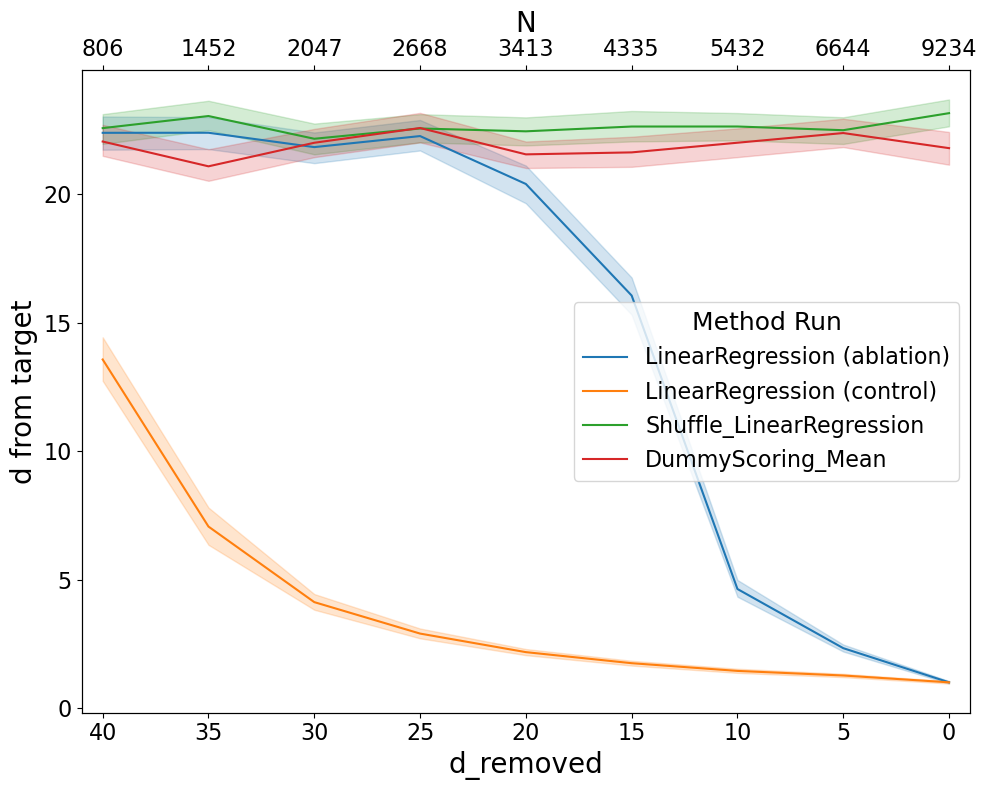

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create the plot
plt.figure(figsize=(10, 8))
ax = sns.lineplot(data=df_last, x='ablation_distance', y='euclidean_distance', hue='method_run')

# Customize the plot
plt.xlabel('d_removed', fontsize=20)
plt.ylabel('d from target', fontsize=20)

# Increase font size for tick labels
plt.tick_params(axis='both', which='major', labelsize=16)

# Modify the legend
ax.legend(title='Method Run', fontsize=16, title_fontsize=18, loc='best')

# Create a secondary x-axis for N values
ax2 = ax.twiny()

# Define the ablation distance and N value pairs
ablation_distances = [0, 5, 10, 15, 20, 25, 30, 35, 40]
N_values = [9234, 6644, 5432, 4335, 3413, 2668, 2047, 1452, 806]

# Set the limits for both axes
ax.set_xlim(41, -1)  # Reversed for inversion
ax2.set_xlim(ax.get_xlim())

# Set the tick locations and labels for both axes
ax.set_xticks(ablation_distances)
ax.set_xticklabels(ablation_distances)
ax2.set_xticks(ablation_distances)
ax2.set_xticklabels(N_values)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='x', which='major', labelsize=16)

# Label the secondary x-axis
ax2.set_xlabel('N', fontsize=20)

# Show the plot
plt.tight_layout()
plotconfig.save_fig("optim_ablation_control")